Group name: Nhóm của Thương

Members: 

*   Nguyễn Hoài Thương - 1912184

*   Đinh Lệ Trân - 1912267

*   Nguyễn Duy Uyên - 1912410

*   Nguyễn Hồng Dân - 1910916

*   Trương Hồng Hoa - 1911185  

# <center>**Bank Customer Churning Prediction**</center>











## **Introduction**


***Type:*** Classification

***Description:***

Customer churn is the situation in which customers stop buying the products or services of a particular company, especially to buy them from a competitor.

Customer churn is a common problem across businesses in many sectors. If you want to grow as a company, you have to invest in acquiring new customers. Every time a customer leaves, it represents a significant investment lost. Both time and effort need to be channelled into replacing them. Being able to predict when a customer is likely to leave, and offer them incentives to stay, can offer huge savings to a business.

Managers at the bank are disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.


We build two models to solve this problem: 


*   Decision Trees
*   Random Forest

Data source: [credit-card-customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers)


We split the dataset into training set (90%) and testing set (10%) 

Data set link: [training and testing set](https://drive.google.com/drive/folders/1XXrIjzORCM07hXQ-Q8HllqGNruDJLdUe?usp=sharing)



##**Importing the Data**


Firstly, we import libraries and modules.

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## **Exploring the data**



We had uploaded the data on Google Drive and now using it here. Below is some information we get from the data.

In [108]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
data = pd.read_csv('/content/gdrive/MyDrive/dataset/training_set/BankChurners.csv')
# data = pd.read_csv('train.csv')
data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


We take first 10 rows from the file and "data.dtypes" to understand the data format. 

About the file, it consists of 23 columns and 9114 rows: 

*Attrition_Flag*: Customer attrition state.

*CLIENTNUM*: Client number. Unique identifier for the customer holding the account.

*Customer_Age*: Customer's Age in Years.

*Gender*: M = Male, F = Female.

*Dependent_count*: Number of dependents.

*Education_Level*: Educational Qualification of the account holder (example: high school, college graduate, etc.).

*Marital_Status*: Married, Single, Divorced, Unknown.

*Income_Category*: Annual Income Category of the account holder (< \$40K, \$40K - 60K, \$60K - \$80K, \$80K-\$120K, > \$120K, Unknown).

*Card_Category*: Type of Card (Blue, Silver, Gold, Platinum).

*Months_on_book*: Period of relationship with bank.

*Total_Relationship_Count*: Total number of products held by the customer.

*Months_Inactive_12_mon*: Number of months inactive in the last 12 months.

*Contacts_Count_12_mon*: Number of Contacts in the last 12 months.

*Credit_Limit*: Credit Limit on the Credit Card.

*Total_Revolving_Bal*: Total Revolving Balance on the Credit Card.

*Avg_Open_To_Buy*: Open to Buy Credit Line (Average of last 12 months).

*Total_Amt_Chng_Q4_Q1*: Change in Transaction Amount (Q4 over Q1).

*Total_Trans_Amt*: Total Transaction Amount (Last 12 months).

*Total_Trans_Ct*: Total Transaction Count (Last 12 months).

*Total_Ct_Chng_Q4_Q1*: Change in Transaction Count (Q4 over Q1).

*Avg_Utilization_Ratio*: Average Card Utilization Ratio.

The last two columns have the same meaning as those name.

In [110]:
data.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

Now, we remove some unused values.

As the chosing file has no duplicated row or null value in any field or unreasonable value as we had skimmed, we do not have to remove those kind. And about the unknown values, we will handle in ***Processing data***.

We drop the last two columns as we don't use those in this model.

In [111]:
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], inplace = True, axis = 1)
data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], inplace = True, axis = 1)

Finding the number of unique values of each column, we have the result below. The figure is quite reasonable.

In [112]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

## **Visualization**

First of all, we will remove *CLIENTNUM* column because this column just contains unique ID for each customer.

In [113]:
data.drop(['CLIENTNUM'],inplace = True, axis=1)

Then, we will filter columns whose type is not object.

In [114]:
numeric = data.select_dtypes(exclude=object).columns
numeric

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

For numeric data, we will use histogram to describe. 

In [115]:
# Defining plot design
def plot_design():
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(i[1], fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(b=None)

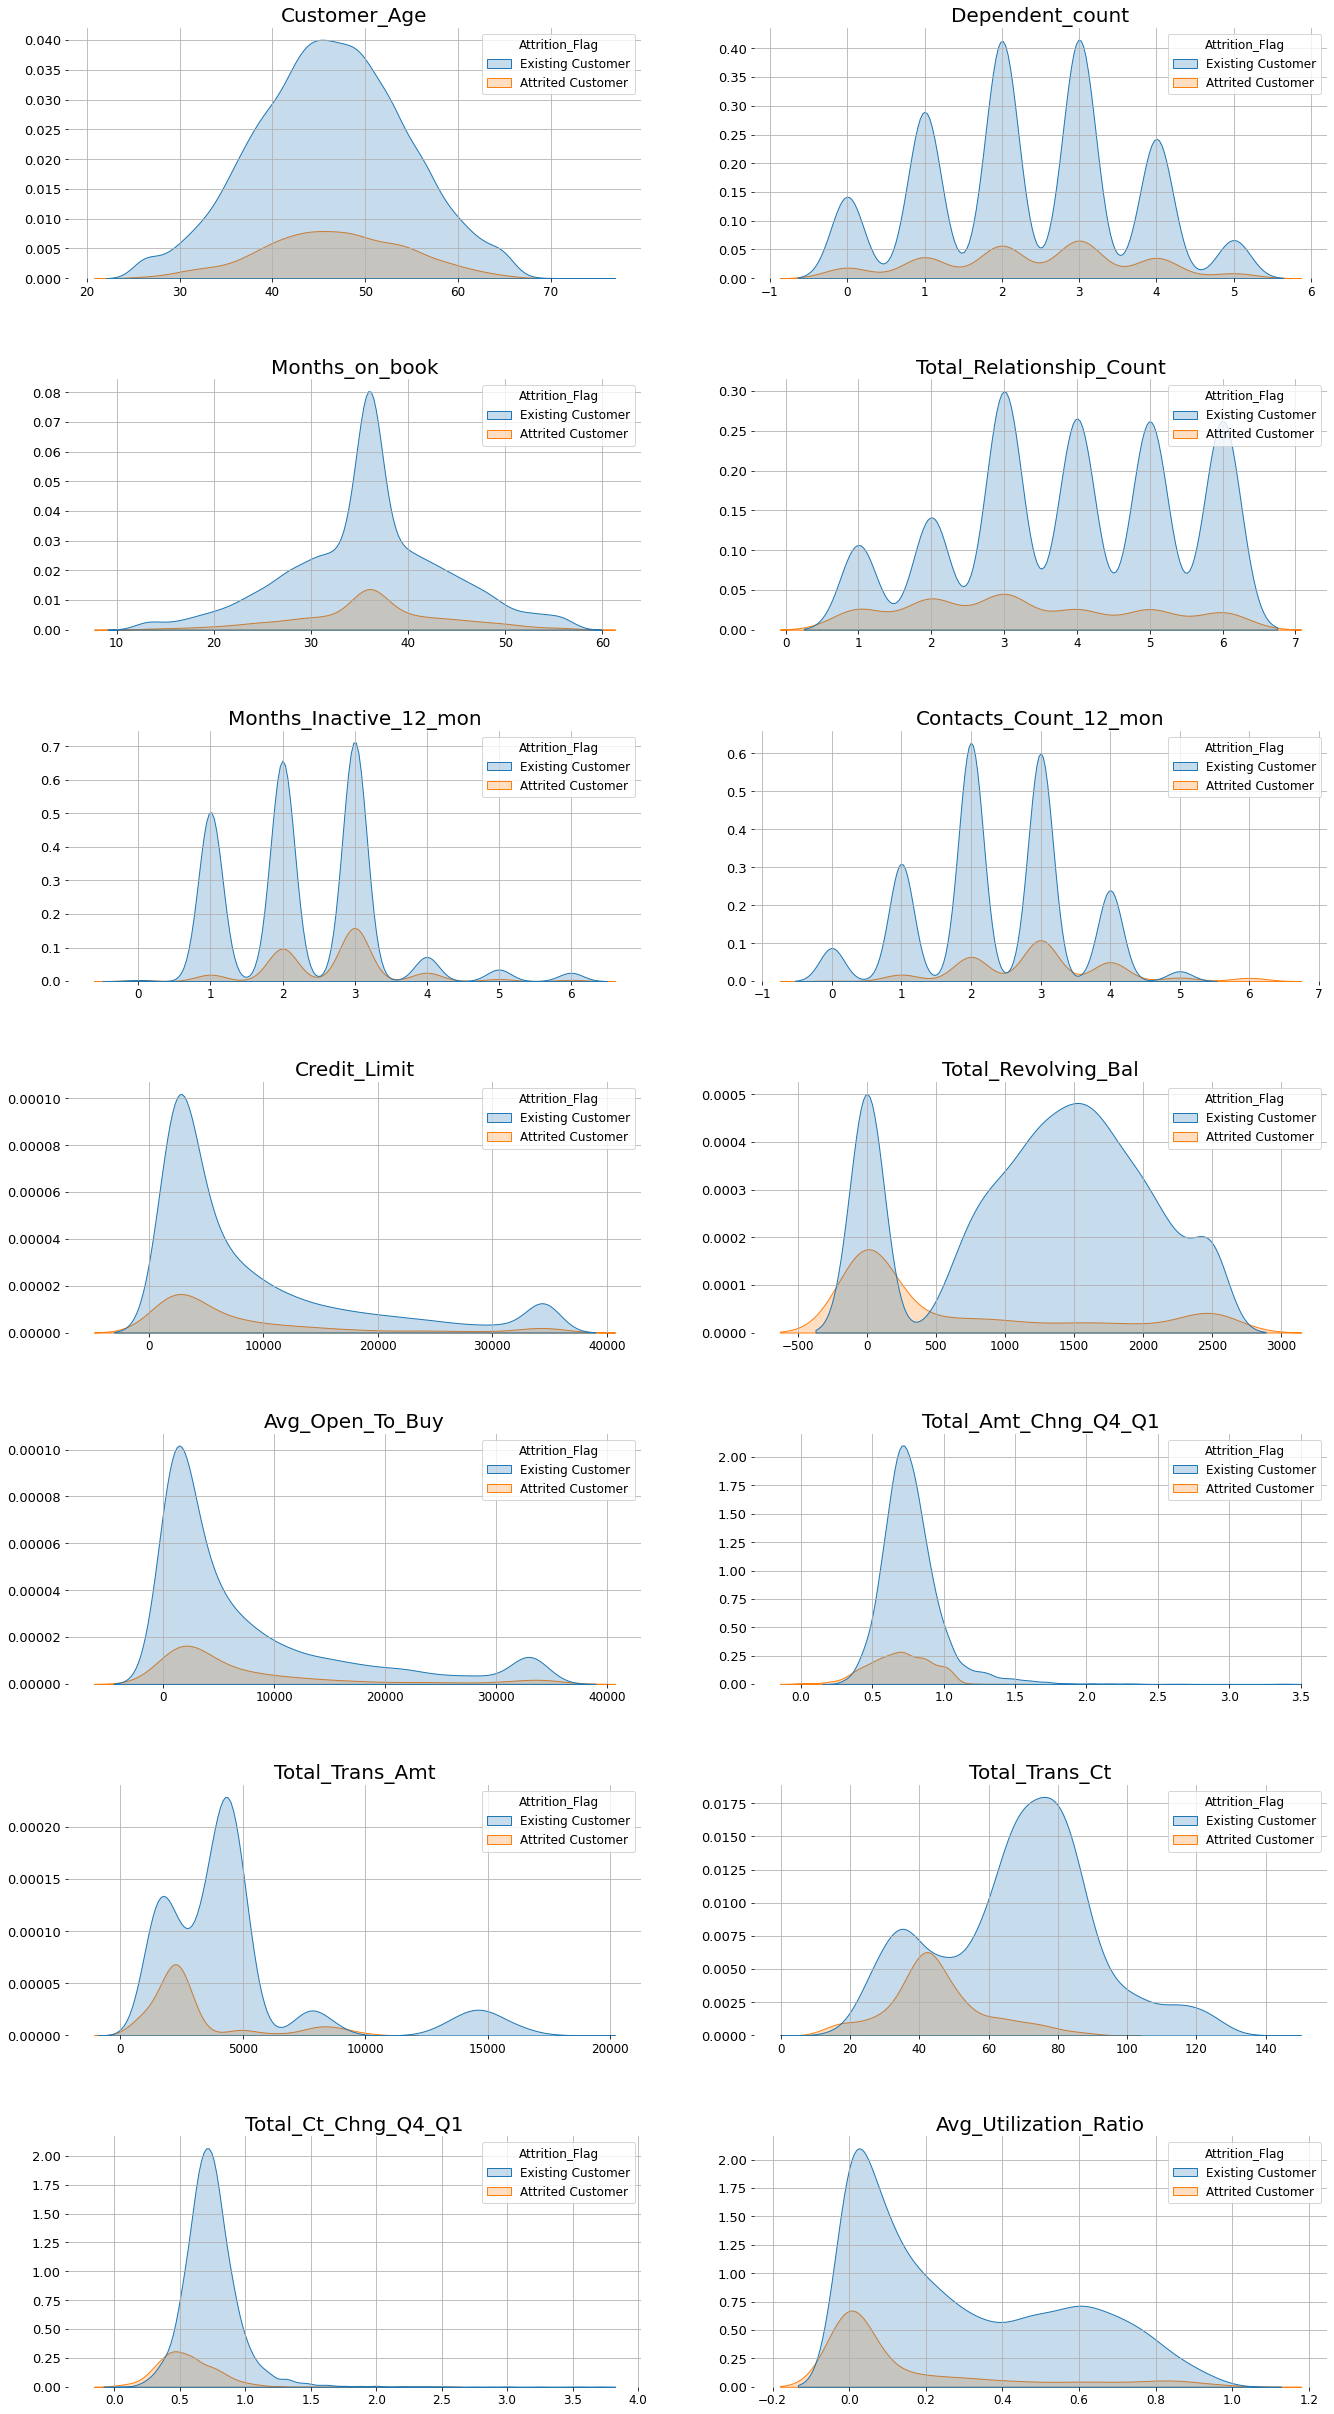

In [116]:
fig, ax = plt.subplots(figsize =(20, 35))
fig.patch.set_facecolor('white')
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['font.size'] = 12

colors = sns.color_palette("dark", n_colors=14).as_hex()

for i in (enumerate(numeric)):
    plt.subplot(7, 2, i[0]+1)
    sns.kdeplot(x = i[1], data = data, color=colors[i[0]], fill=True, hue = 'Attrition_Flag'
)
    plot_design()

We can see that there are total of 14 histograms. For each plot, we will describe the main characteristics:


*   ***Customer_Age***: The age of customers has a normal distribution with a mean of 45 for two labels.   
*   ***Dependent_count***: The number of dependents of each customers is usually 2 or 3 for two labels. This plot seems to be symmetrical.
*   ***Months_on_book***: The histogram is symmetrical. The number of customers which their periods of relationship with the bank were 3 years is overwhelming for both.
*   ***Total_Relationship_Count***: We can easily see that customers who want to leave seem have less relationships with the bank than loyal customers.
*   ***Months_Inactive_12_mon***: The plot is asymmetrical for two labels. Normally, a customer is inactive for 1 to 3 months in the last 12 months.
*   ***Contacts_Count_12_mon***: In the last 12 months, customers usually contact to the bank for 2 to 3 months.
*   ***Credit_Limit***: The *Credit_Limit* histogram has a long-tail distribution for two labels. The credit limit of customers are mainly concentrated in the range of 0 to 500. However, the credit limit of customers whose labels are 0 are
concentrated at 15000.
*   ***Total_Revolving_Bal***: The plot for label 1 seems to have long-tail distribution with a peak at 0. However, the plot for label 0 can be split in to 2 parts. Each part seems has balanced distribution. The first part has the peak at 0 like the label 1. The second has the peak at 1500.
*   ***Avg_Open_To_Buy***: The histogram of this feature is quite similar to *Credit_Limit*'s. The peak of two labels is about 2000.
*   ***Total_Amt_Chng_Q4_Q1***: The change in transaction amount (Q4 over Q1) of customers has a normal distribution for both.
*   ***Total_Trans_Amt***: The distribution of two labels is completely different. The label 1 has a normal distribution with a peak at ~2300 while the label 0 has many maximums: ~2000, ~4500 (global maximum), ~8000 and ~14500.
*   ***Total_Trans_Ct***: The total transaction count in the last 12 months of customers who want to leave the bank has a normal distribution. The global maximum of this distribution is ~45. Meanwhile, with the label 0, the number of customers whose total transaction counts are from 70 to 85 is overwhelming. Besides, the distribution of the label 0 also has a local maximum at ~35.
*   ***Total_Ct_Chng_Q4_Q1***: For two labels, the change in transaction count (Q4 over Q1) of customers has normal distribution.
*   ***Avg_Utilization_Ratio***: The plot has a long-tail distribution for two labels. The peak seems to be at 0 for both.

For features whose types are object, we will use pie chart for those have 2 unique values. As for the rest, we'll use bar chart to visualize.

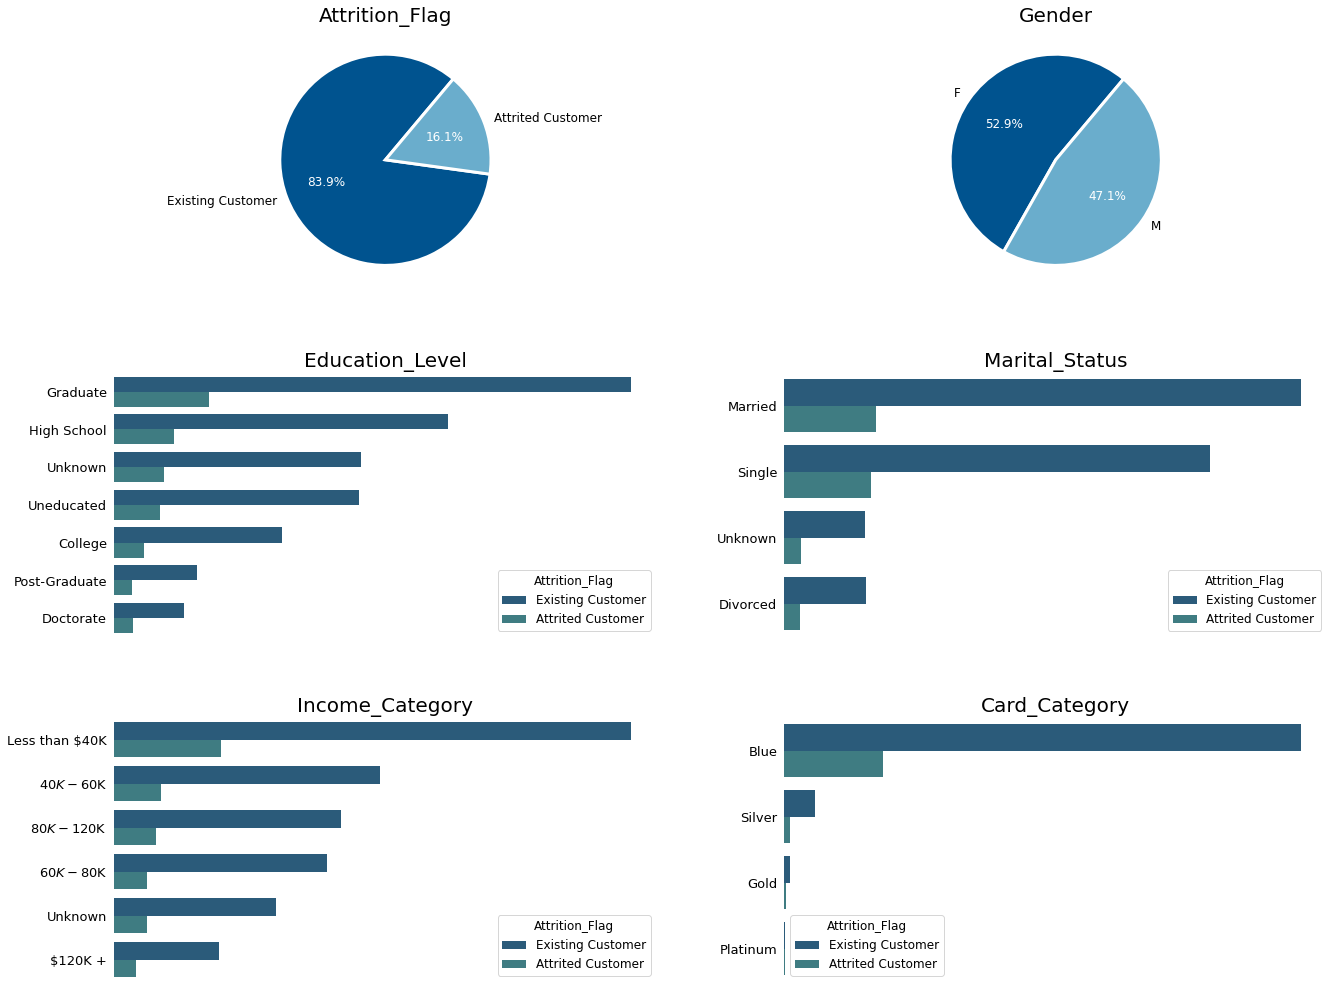

In [117]:
# Select categorical variables
categ = data.select_dtypes(include=object).columns

# Visualize
fig, ax = plt.subplots(figsize =(20, 20))
fig.patch.set_facecolor('white')

mpl.rcParams['font.size'] = 12

colors = sns.color_palette("crest_r", n_colors=3).as_hex()

# Loop columns
for i in (enumerate(categ)):
    plt.subplot(4, 2, i[0]+1)
    
    if data[i[1]].value_counts().count() > 2:
        ax = sns.countplot(y = i[1], data = data, order=data[i[1]].value_counts().index, palette=colors, hue = 'Attrition_Flag')
        pct = data[i[1]].value_counts(ascending=False, normalize=True).values * 100
        #ax.bar_label(container=ax.containers[0], labels=list(map('{:.2f}%'.format,pct)), padding=3, size=12, color='black')
        ax.grid(False)
        ax.grid(b=None)
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.set_xticklabels('')
        plot_design()

    else:
        _, texts, pcts = plt.pie(
            data[i[1]].value_counts(), 
            labels=data[i[1]].value_counts().index, 
            colors= ['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50)
        for pcts in pcts:
            pcts.set_color('white')
        plt.title(i[1], fontsize=20, color='black')
       

For pie charts:


*   ***Attrition_Flag***: This feature is the target. We can see easily that the number of customers who are likely to leave is only about one fifth of the rest.  This ratio seems pretty high so we need to have suitable strategies to retain customers.
*   ***Gender***: The ratio approx 1:1. This ratio is consistent with the sex ratio in nature.

For bar charts:
*   ***Education_Level***: For two labels, the number of graduated customers is the highest. A high degree like doctorate accounts for the smallest percentage. The 'Unknown' value accounts for a quite considerable amount.
*   ***Marital_Status***: Most customers fall into categories 'Married' or 'Single'. There are not so many 'Unknown' records.
*   ***Income_Category***: We can see that customers who have low income accounts for the highest percentage. There are not many 'Unknown' records.
*   ***Card_Category***: Most customers have blue cards. The number of customers who have gold or platinum cards is almost negligible.



We'll use boxplot to describe numeric features which have at least 11 unique values.

<function matplotlib.pyplot.show>

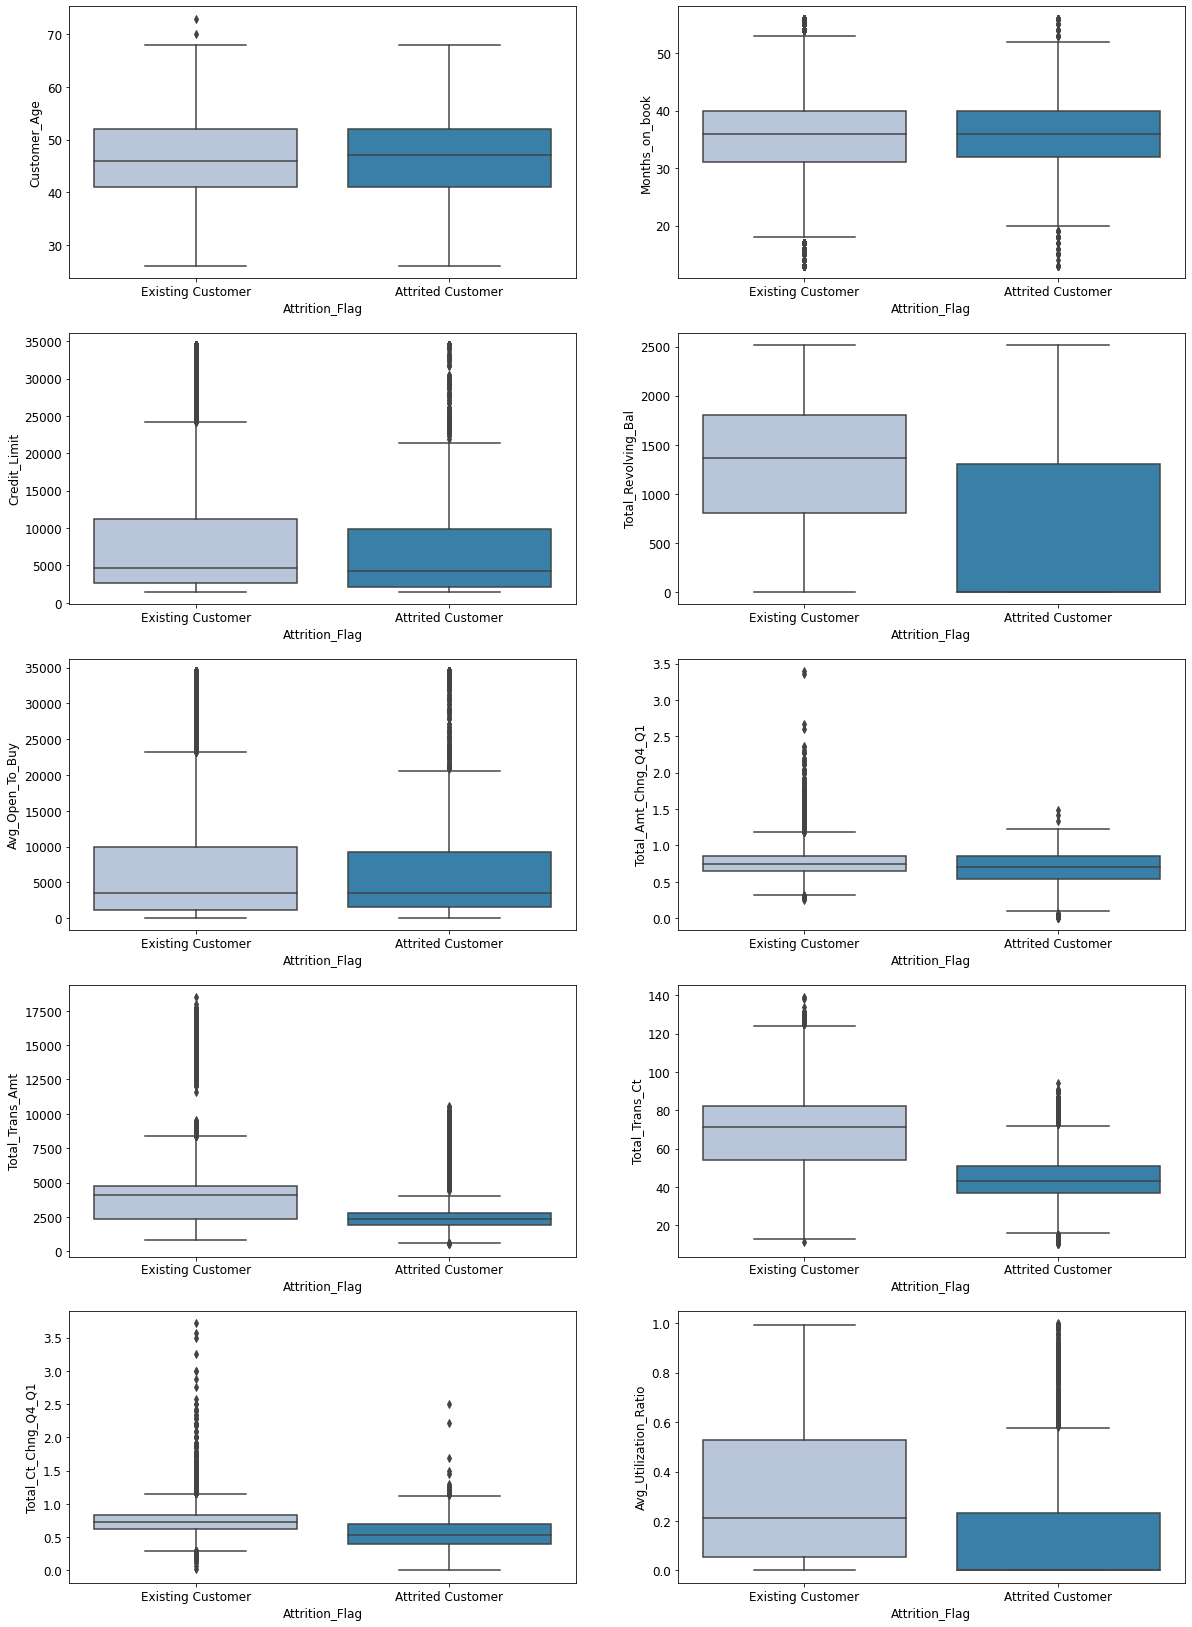

In [118]:
# %matplotlib inline
# import matplotlib as mpl
# import matplotlib.pyplot as plt

plt.figure(figsize=(20, 35))
a = 1
for i in data.columns:
  if data[i].nunique() > 10:
    plt.subplot(6,2,a)
    sns.boxplot(data = data, x = 'Attrition_Flag', y = i, palette="PuBu")
    a = a+1

plt.show

Some features in charts:
*   Some features have many outliers: *Months_on_book, Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio*
*   Some features have two great different median values for two labels: *Total_Revolving_Bal, Total_Trans_Amt, Total_Trans_Ct, Avg_Utilization_Ratio*



## **Processing Data**


> ***Processing NULL or UNKNOWN  value***


First, we find out the columns with type "objects" and count the unique value of each column.

In [119]:
for c in data.columns:
  if data[c].dtypes == object:
    print(data[c].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


The *Education_Level*, *Income_Category*, *Marital_Status* columns have many 'Unknown' values, so we can't delete or change them to the specific value. Therefore, we use One Hot Encoding to these columns.

In [120]:
data = data.join(pd.get_dummies(data['Education_Level'], prefix='Education_Level'))
data = data.join(pd.get_dummies(data['Income_Category'], prefix='Income_Category'))
data = data.join(pd.get_dummies(data['Marital_Status'], prefix='Marital_Status'))


In [121]:
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


Since we used One Hot Encoding, we will delete the columns that are no longer needed. 

In [122]:
data = data.drop('Marital_Status',axis = 1)
data = data.drop('Income_Category',axis = 1)
data = data.drop('Education_Level',axis = 1)

With columns *Attrition_Flag* and *Gender*, we see that each column has only 2 special values, the *Attrition_Flag* column has 'Existing_Customer' and 'Attrited_Customer',  the *Gender* column has 'M' and 'F'. We will replace those two values with 0 and 1 values respectively.

*Card_Category* column has four values and we easily see that they are ordered, so we will replace those values with number 1, 2, 3, 4 in order of 'Blue', 'Silver', 'Gold', 'Platinum'.

In [123]:
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Existing Customer', 0)
data['Attrition_Flag'] = data['Attrition_Flag'].replace('Attrited Customer', 1)
data['Gender'] = data['Gender'].replace('M', 0)
data['Gender'] = data['Gender'].replace('F', 1)
data['Card_Category'] = data['Card_Category'].replace('Blue', 1)
data['Card_Category'] = data['Card_Category'].replace('Silver', 2)
data['Card_Category'] = data['Card_Category'].replace('Gold', 3)
data['Card_Category'] = data['Card_Category'].replace('Platinum', 4)

We will look at the characteristics of the data set to know the volatility as well as the outliers of the data set 

In [124]:
data.describe(percentiles = [.1, .25, .5, .75, .97, .999])


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.529081,2.346203,1.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.100030,0.044534,0.308877,0.198776,0.050953,0.146835,0.149995,0.071788,0.176755,0.138442,0.151575,0.351634,0.109805,0.073862,0.462822,0.389355,0.073961
std,0.367235,8.016814,0.499178,1.298908,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.300054,0.206289,0.462053,0.399098,0.219912,0.353959,0.357084,0.258150,0.381480,0.345380,0.358626,0.477504,0.312663,0.261559,0.498641,0.487628,0.261720
min,0.000000,26.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,36.000000,0.000000,1.000000,1.000000,26.000000,2.000000,1.000000,1.000000,1762.000000,0.000000,683.000000,0.531000,1501.000000,33.000000,0.452000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,46.000000,1.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,52.000000,1.000000,3.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
97%,1.000000,62.000000,1.000000,5.000000,2.000000,52.000000,6.000000,4.000000,4.000000,34516.000000,2517.000000,33048.440000,1.240440,14932.440000,114.000000,1.167000,0.836220,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99.9%,1.000000,65.000000,1.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.200976,17115.724000,130.000000,2.500000,0.983000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

> ***Skew features***


Next, we calculate "skew" and "kurtosis" of the data to find out the abnormal columns.

In [125]:
data.agg(['skew', 'kurtosis']).transpose()


,skew,kurtosis
Attrition_Flag,1.848449,1.417043
Customer_Age,-0.033605,-0.288620
Gender,-0.116537,-1.986811
Dependent_count,-0.020826,-0.683017
Card_Category,4.605743,24.089915
Months_on_book,-0.106565,0.400100
Total_Relationship_Count,-0.162452,-1.006131
Months_Inactive_12_mon,0.633061,1.098523
Contacts_Count_12_mon,0.011006,0.000863
Credit_Limit,1.666726,1.808989


There are many columns that are unbalanced, but *Credit_Limit*, *Avg_Open_To_Buy* and *Total_Trans_Amt* columns we need to balance. These columns has many unique values so they can heavily affect our model.

We'll use the Box-Cox transformation to transform all the skew features into a nearly normal distribution.

In [126]:

data["Credit_Limit"], l1 = boxcox(data["Credit_Limit"])
data["Avg_Open_To_Buy"], l2 = boxcox(data["Avg_Open_To_Buy"])
data["Total_Trans_Amt"], l3 = boxcox(data["Total_Trans_Amt"])




> ***Data Normalization***



Converting floating-point feature values from their natural range into a standard range, between 0 and 1 in this report. Use the following formula to scale to a range:

<center>x' = (x - x_min)/(x_max - x_min)</center>

In [127]:
def normalize(a):
  return (a - a.min()) / (a.max() - a.min())
for column in data.columns:
    if data[column].max() > 1:
        data[column] = normalize(data[column])
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,0.404255,0,0.6,0.000000,0.604651,0.8,0.166667,0.500000,0.776815,0.308701,0.870149,0.392994,0.269847,0.248062,0.437534,0.061,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0.489362,1,1.0,0.000000,0.720930,1.0,0.166667,0.333333,0.659345,0.343266,0.813340,0.453636,0.307709,0.178295,1.000000,0.105,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0.531915,0,0.6,0.000000,0.534884,0.6,0.166667,0.000000,0.367812,0.000000,0.723401,0.763615,0.422582,0.077519,0.628164,0.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0.297872,1,0.8,0.000000,0.488372,0.4,0.666667,0.166667,0.356082,1.000000,0.559588,0.413600,0.277202,0.077519,0.628164,0.760,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0.297872,0,0.6,0.000000,0.186047,0.8,0.166667,0.000000,0.482879,0.000000,0.760658,0.640271,0.160625,0.139535,0.673129,0.000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,0,0.4,0.000000,0.627907,0.4,0.333333,0.500000,0.425617,0.735399,0.670539,0.206947,0.961268,0.829457,0.230749,0.462,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
10123,1,0.319149,0,0.4,0.000000,0.279070,0.6,0.333333,0.500000,0.449071,0.868494,0.667280,0.236679,0.830708,0.457364,0.183899,0.511,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
10124,1,0.382979,1,0.2,0.000000,0.534884,0.8,0.500000,0.666667,0.528745,0.000000,0.776647,0.241095,0.868626,0.387597,0.220248,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
10125,1,0.085106,0,0.4,0.000000,0.534884,0.6,0.500000,0.500000,0.520863,0.000000,0.773849,0.157492,0.820410,0.403101,0.194400,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1




> **Data Correlation**






***df.corr()***: compute pairwise correlation of columns. Correlation shows how the two variables are related to each other.


*   Positive values: one variable increases other variable increases.
*   Negative values: one variable increases other variable decreases.

Bigger the values, more strongly two varibles are correlated and viceversa.

***Heatmap*** is used to visualize correlation using Seaborn library.



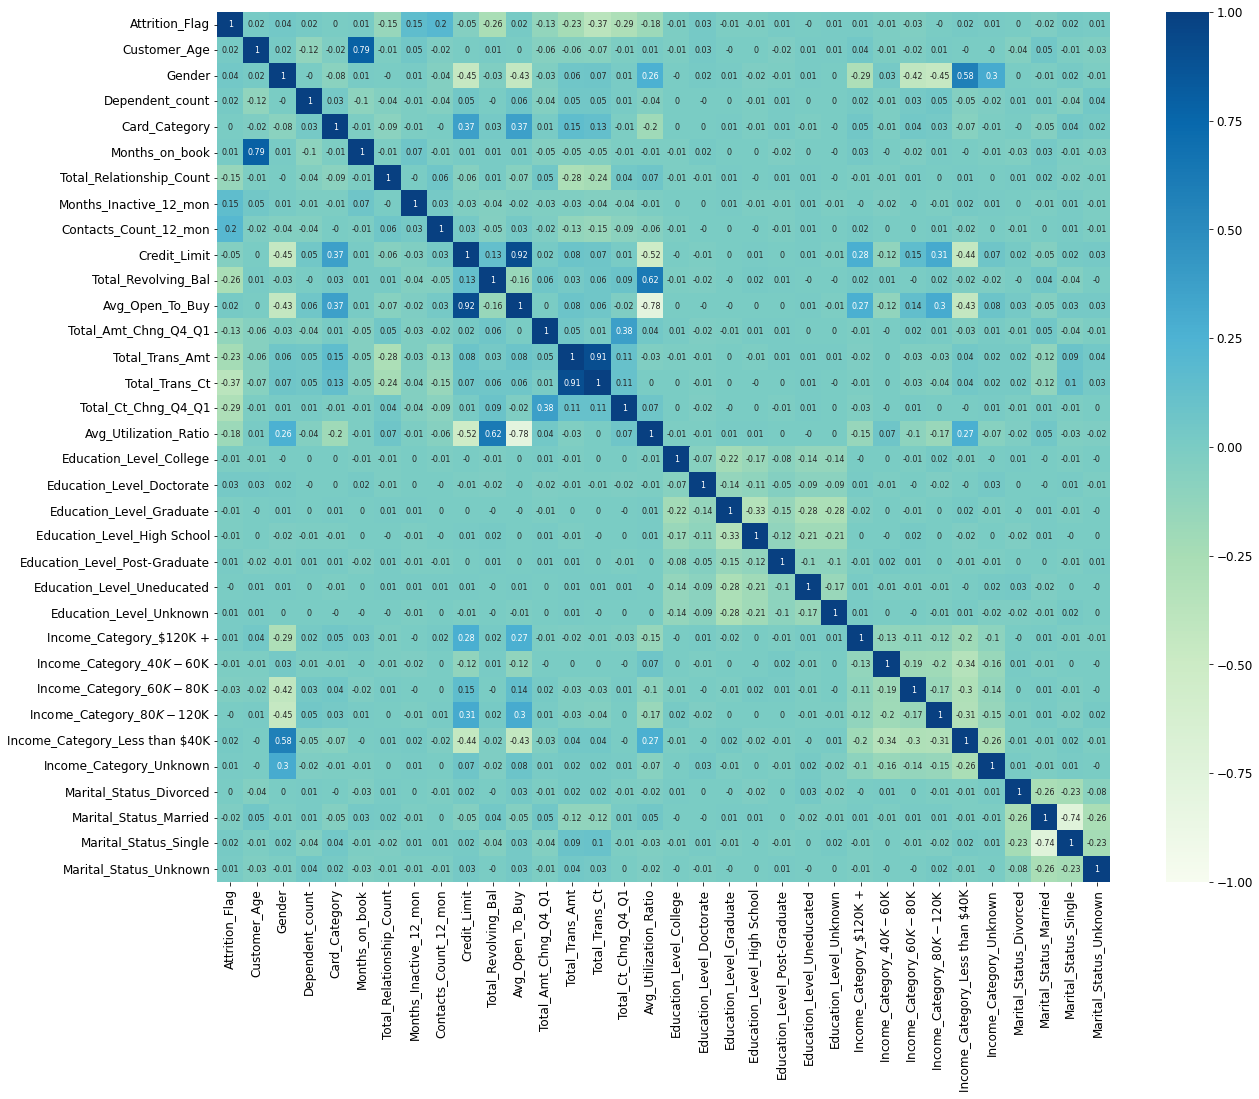

In [128]:
plt.figure(figsize=(20,16))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='GnBu', annot=True, 
            annot_kws={"size": 8}, vmin=-1, vmax=1);

***Reviews:*** 

*   Correlation coefficient between most of the variables is relatively low and the correlation is weak. 
*   Some pairs have strongly correlated, such as *Avg_Open_To_Buy* and *Credit_Limit*, *Total_Trans_Amt* and *Total_Trans_Ct*. These are the variables that can be considered for use in the model.







> **Changing some column names for processing**



In [129]:
data = data.rename(columns={'Education_Level_High School': 'Education_Level_High_School',
                            'Education_Level_Post-Graduate': 'Education_Level_Post_Graduate',
                            'Income_Category_$120K +': 'Income_Category_120K',
                            'Income_Category_$40K - $60K': 'Income_Category_40K_60K',
                            'Income_Category_$60K - $80K': 'Income_Category_60K_80K',
                            'Income_Category_$80K - $120K': 'Income_Category_80K_120K',
                            'Income_Category_Less than $40K': 'Income_Category_Less_than_40K'})
data

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High_School,Education_Level_Post_Graduate,Education_Level_Uneducated,Education_Level_Unknown,Income_Category_120K,Income_Category_40K_60K,Income_Category_60K_80K,Income_Category_80K_120K,Income_Category_Less_than_40K,Income_Category_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,0.404255,0,0.6,0.000000,0.604651,0.8,0.166667,0.500000,0.776815,0.308701,0.870149,0.392994,0.269847,0.248062,0.437534,0.061,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,0.489362,1,1.0,0.000000,0.720930,1.0,0.166667,0.333333,0.659345,0.343266,0.813340,0.453636,0.307709,0.178295,1.000000,0.105,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0.531915,0,0.6,0.000000,0.534884,0.6,0.166667,0.000000,0.367812,0.000000,0.723401,0.763615,0.422582,0.077519,0.628164,0.000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0.297872,1,0.8,0.000000,0.488372,0.4,0.666667,0.166667,0.356082,1.000000,0.559588,0.413600,0.277202,0.077519,0.628164,0.760,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,0,0.297872,0,0.6,0.000000,0.186047,0.8,0.166667,0.000000,0.482879,0.000000,0.760658,0.640271,0.160625,0.139535,0.673129,0.000,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,0.510638,0,0.4,0.000000,0.627907,0.4,0.333333,0.500000,0.425617,0.735399,0.670539,0.206947,0.961268,0.829457,0.230749,0.462,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
10123,1,0.319149,0,0.4,0.000000,0.279070,0.6,0.333333,0.500000,0.449071,0.868494,0.667280,0.236679,0.830708,0.457364,0.183899,0.511,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
10124,1,0.382979,1,0.2,0.000000,0.534884,0.8,0.500000,0.666667,0.528745,0.000000,0.776647,0.241095,0.868626,0.387597,0.220248,0.000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
10125,1,0.085106,0,0.4,0.000000,0.534884,0.6,0.500000,0.500000,0.520863,0.000000,0.773849,0.157492,0.820410,0.403101,0.194400,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## **Principal Component Analysis(PCA)**



> Use **ANOVA** to make sure that the interaction effect between pairwise of columns.



In [130]:
iris_lm=ols('Attrition_Flag ~  Gender + Customer_Age + Avg_Open_To_Buy + Dependent_count + Education_Level_College + Education_Level_Doctorate + Education_Level_Graduate + Education_Level_High_School + Education_Level_Post_Graduate + Education_Level_Uneducated + Education_Level_Unknown + Income_Category_120K + Income_Category_40K_60K + Income_Category_60K_80K + Income_Category_80K_120K + Income_Category_Less_than_40K + Income_Category_Unknown + Card_Category + Months_on_book + Total_Relationship_Count + Months_Inactive_12_mon + Contacts_Count_12_mon + Credit_Limit + Total_Revolving_Bal + Total_Amt_Chng_Q4_Q1 + Total_Trans_Amt + Total_Trans_Ct + Total_Ct_Chng_Q4_Q1 + Avg_Utilization_Ratio + Marital_Status_Divorced + Marital_Status_Married + Marital_Status_Single + Marital_Status_Unknown', data=data).fit() 
a = sm.stats.anova_lm(iris_lm, typ=2)


> Sort and select 15 columns have more effect on the model



In [131]:
a = a.sort_values(by='PR(>F)')
b = a.head(15)
b

,sum_sq,df,F,PR(>F)
Total_Trans_Ct,159.122246,1.0,1938.379105,0.000000e+00
Total_Trans_Amt,57.783497,1.0,703.901089,5.432910e-150
Total_Relationship_Count,46.453679,1.0,565.884670,9.475198e-122
Total_Ct_Chng_Q4_Q1,40.651956,1.0,495.209842,3.843147e-107
Marital_Status_Single,24.204543,1.0,294.852430,3.653034e-65
Contacts_Count_12_mon,19.913933,1.0,242.585516,4.560399e-54
Marital_Status_Divorced,18.675621,1.0,227.500770,7.474776e-51
Marital_Status_Unknown,18.358003,1.0,223.631649,5.000546e-50
Marital_Status_Married,17.737389,1.0,216.071513,2.055585e-48
Income_Category_80K_120K,17.176563,1.0,209.239699,5.923936e-47


In [132]:
features = b.index
features

Index(['Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Relationship_Count',
       'Total_Ct_Chng_Q4_Q1', 'Marital_Status_Single', 'Contacts_Count_12_mon',
       'Marital_Status_Divorced', 'Marital_Status_Unknown',
       'Marital_Status_Married', 'Income_Category_80K_120K',
       'Income_Category_120K', 'Months_Inactive_12_mon',
       'Education_Level_Graduate', 'Education_Level_High_School',
       'Income_Category_60K_80K'],
      dtype='object')

## **Splitting the dataset**

In [133]:
y = data['Attrition_Flag']

In [134]:
X = pd.DataFrame(data, columns = features)

X contains columns which is features of data and y is target column titled *Attrition_Flag*



In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=25)


We will use  90%  of the data for training purpose, and once training is completed, we will use the remaining 10%  of the data to check the training accuracy of our trained model.

##**Decision Trees Model**


In [136]:
DT = DecisionTreeClassifier(max_depth=12, random_state=20)
DT.fit(X_train, y_train)
DT.score(X_test, y_test)

0.9417571569595261

Text(0.5, 1.0, 'Confusion Matrix')

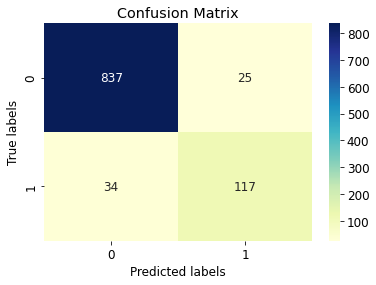

In [137]:
y_pred = DT.predict(X_test)
cm_DT = confusion_matrix(y_test, y_pred)

DT_mx = plt.subplot()
sns.heatmap(cm_DT, annot=True, fmt='g', cmap='YlGnBu', ax = DT_mx)
# labels, title and ticks
DT_mx.set_xlabel('Predicted labels')
DT_mx.set_ylabel('True labels')
DT_mx.set_title('Confusion Matrix')

On the Confusion Matrix, out of 862 existing customers, model predicts that 837 customers will continue using bank services and 25 will leave. 
Besides, out of 151 attrited customers, model predicts that 34 customers will continue and 117 will leave. 


Predicting that customer will leave is highly correct. Customers who are predicted to leave account for about 80% of attrited customers.


##**Random Forest Model**


In [138]:
RF = RandomForestClassifier(random_state=20)
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.9595261599210266

Text(0.5, 1.0, 'Confusion Matrix')

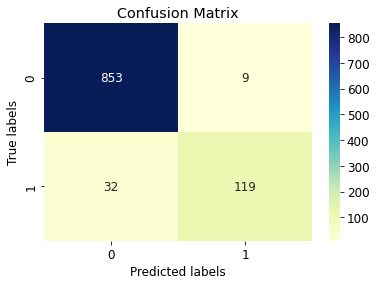

In [139]:
y_pred = RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred)

RF_mx = plt.subplot()
sns.heatmap(cm_RF, annot=True, fmt='g', cmap='YlGnBu', ax = RF_mx)
# labels, title and ticks
RF_mx.set_xlabel('Predicted labels')
RF_mx.set_ylabel('True labels')
RF_mx.set_title('Confusion Matrix')

Out of 862 existing customers, model predicts that 853 customers will continue and 9 will leave. 
Besides, out of 151 attrited customers, model predicts that 32 customers will continue and 119 will leave. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



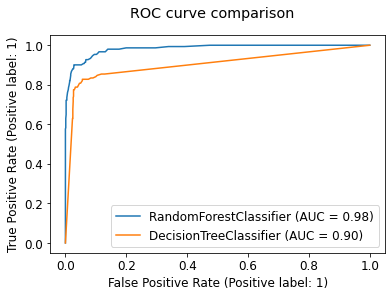

In [140]:

fig = metrics.plot_roc_curve( RF, X_test, y_test)
fig = metrics.plot_roc_curve( DT, X_test, y_test, ax = fig.ax_)

fig.figure_.suptitle("ROC curve comparison")
plt.show() 

As we can see in Roc curve comparison graph above, RandomForestClassifier Model get good AUC on validation dataset.


Therefore, from this step onward we will work with RandomForestClassifier Model.

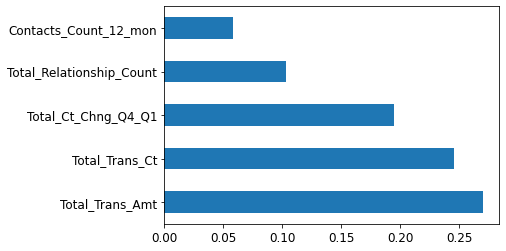

In [141]:
(pd.Series(RF.feature_importances_, index=X_train.columns)
   .nlargest(5)
   .plot(kind='barh'))

The top five important features among dependent variables of X_train are *Total_Trans_Amt, Total_Trans_Ct,  Total_Ct_Chng_Q4_Q1, Total_Relationship_count, Contacts_Count_12_mon*. These factors greatly affect customers' decision to stay or leave.

##**Predicting testing set**


Testing set has been preprocessed. It has the same columns as the training set.

In [142]:
test_set = pd.read_csv('/content/gdrive/MyDrive/dataset/test_set/test.csv')
target = test_set['Attrition_Flag']
test_set.drop(['Attrition_Flag'], inplace = True, axis = 1)

In [143]:
predicts = RF.predict(test_set)

Text(0.5, 1.0, 'Confusion Matrix')

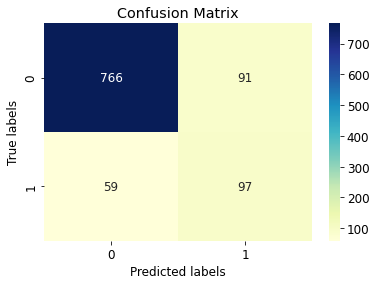

In [144]:
e = confusion_matrix(target, predicts)

RF_mx = plt.subplot()
sns.heatmap(e, annot=True, fmt='g', cmap='YlGnBu', ax = RF_mx)
# labels, title and ticks
RF_mx.set_xlabel('Predicted labels')
RF_mx.set_ylabel('True labels')
RF_mx.set_title('Confusion Matrix')

In [145]:
RF.score(test_set, target)

0.8519249753208292

Predicting result is quite acceptable. However, this result is not as good as validation result because validation dataset has been observed and used in the building model process.


##Conclusion


1.   The model predicted correct the churners from the testing set 85.19% of the times.

2.   The precision of the model on data set predicting 0's is higher with regard to predicting 1's i.e. those customers that churn. Although the model has a good accuracy, it still misses about 37.82% of those who end up churning. This could be improved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned.

3. The bank should reach out to customers for retention if their transaction amounts and/or counts were relatively below the average level in the last 12 months, since these two features are the most likely to be associated with churning later. Some strategies for retaining these customers could be offering a credit card package with lower interest rates, or asking if they would be interested in upgrading their membership level if they have been a loyal customers (say for 2 years).


In the future, we will improve performance with Data, Algorithms, Algorithm Tuning, Ensembles to gain better result.